<a href="https://colab.research.google.com/github/ljs7463/study-repository/blob/master/Data%20analysis%20practice/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/titanic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코드에 대한 설명및 분석내용은 코드 바로 아래 칸에 위치

한글폰트

In [238]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


런타임 다시시작

In [239]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 데이터 불러오기

In [240]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')
combine = [train_df, test_df]

# 데이터 확인하기

**가설 : 좋은 티켓일수록 생존율이 높으며, 상대적으로 약자인 아이와 여성의 생존율이 높을것이다.**

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**1. Age, Cabin, Embarked 에 NaN값이 존재**

**2. Cabin은 NaN값이 매우 많은 데이터 이며 예측에 있어 중요한 데이터가 아니기 때문에 컬럼을 지워도 될것 같다.**

**3. Ticket 데이터 또한 생존률과 연관이 적어보이므로 지워도 될것 같다.**

**4.  Name, Sex, Age, Fare, Embarked 는 인코딩 작업이 필요 해 보인다.** 

In [243]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Sibsp 와 Parch는 한개의 컬럼으로 줄일 수 있을것 같다.**

**2. Embarked는 위의 자료만으로 확실하게 필요한 데이터 라는 여부를 판단하기 힘들어 시각화를 통해 비교후 결정하기로 한다.**

In [244]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**train_df 데이터셋과 한가지 다른점은 'Fare'에 NaN값이 하나 존재한다**

In [245]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1. 생존을 못한 승객이 더 많다는 것을 알 수 있다.**

**2. 3등급 티켓을 가진 승객이 가장 많다는것을 알 수 있다.**

**3. 평균 나이가 29세 이지만 최고령 탑승자의 나이가 80 인 것을 보아 편차가 많은것 같다.**

**4. 대부분 혼자 왔지만 8명까지도 같이 탑승한 승객이 있다.**

**5. 요금 역시 편차가 심한것을 확인 할 수 있다.**

In [246]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [247]:
train_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Haas, Miss. Aloisia",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [248]:
test_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Faunthorpe, Mr. Harry",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**1. 남성 탑승객이 여성 탑승객 보다 많은 것을 알 수 있다.**

**2. 대부분의 승객은 Southampton에서 탑승한 것을 알 수 있다.**

# 시각화를 통한 데이터 탐색하기

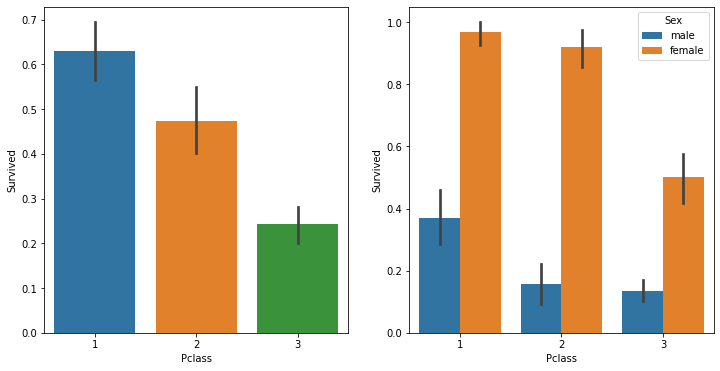

In [249]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.barplot(x = 'Pclass', y = 'Survived', ax = axes[0], data = train_df)
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', ax = axes[1], data = train_df)

**티켓의 등급이 높을 수록 생존율이 높으며, 그 중에서도 여성이 높다는 것을 알 수 있다.**

In [250]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


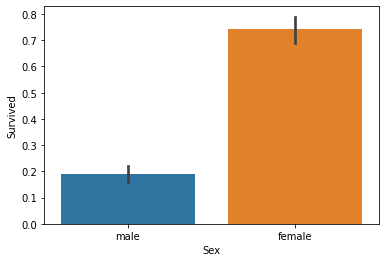

In [251]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)

**여성의 생존율이 훨씬 높다는 것을 알게 되었다.**

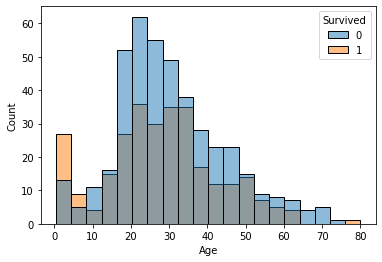

In [252]:
sns.histplot(x = 'Age',hue = 'Survived', data = train_df)

**어린아이의 생존률이 가장 높은것을 알 수 있다.**

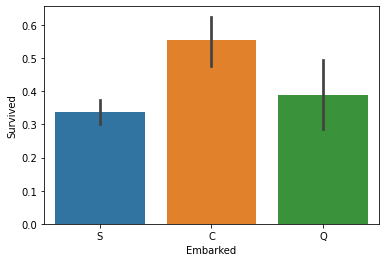

In [253]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

지역이 다르다고 생존률과 연관성을 찾지 못하여 해당 컬럼은 삭제 해야 할것같다.


Age 와 Fare 같은 데이터는 전처리 이후 시각화 할 예정

# 데이터 전처리

## Name 컬럼 전처리

In [254]:
# train_df
Name = []

for i in train_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [255]:
# test_df
Name2 = []

for i in test_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name2.append(h[:-1])

Name2

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [256]:
# train_df
train_df['Name'] = pd.Series(Name)
train_df['Name']

# test_df
test_df['Name'] = pd.Series(Name2)
test_df['Name'] 

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [257]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

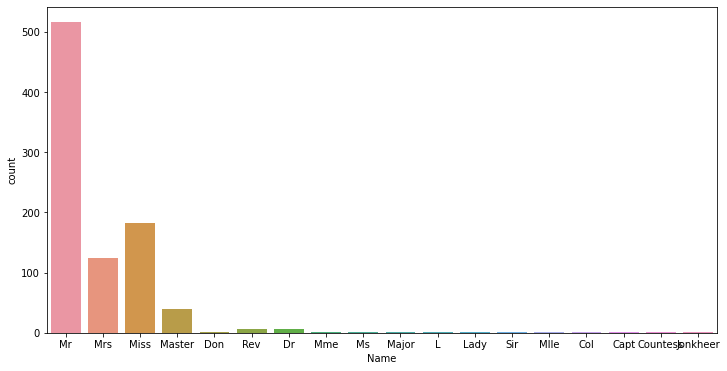

In [258]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = train_df)

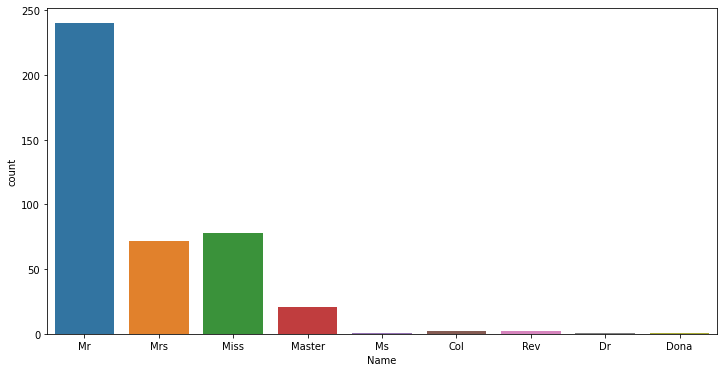

In [259]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = test_df)

Mr, Mrs, Miss, Master 를 제외한 다른 이름들은 극히 적은 인원수 를 가지고 있으므로 Others로 통일한다.

In [260]:
for all_data in combine:
  all_data['Name'] =all_data['Name'].replace (['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer','Dona'],'Others') # test셋에만 Dona라는 이름이 있으므로 주의

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Others,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [261]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [262]:
test_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [263]:
# 다수의 이름 순서대로 mapping

name_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Others' : 5}
for all_data in combine:
  all_data['Name'] = all_data['Name'].map(name_mapping).astype(int)

# train_df
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,5,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,1,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,1,male,NaN,0,0,359309,8.0500,NaN,S


## Sex 컬럽 전처리

In [264]:
sex_mapping = {'male' : 0, 'female' : 1}
for all_data in combine:
  all_data['Sex'] = all_data['Sex'].map(sex_mapping).astype(int)
  
#train_df  
test_df



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,3,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,3,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,5,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,1,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,1,0,NaN,0,0,359309,8.0500,NaN,S


**남성을 0 , 여성을 1로 전처리 해주었다.**

In [265]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [266]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Age 컬럼 전처리

**현재 까지 알고있는 전처리 방법론은  첫 번째로, 해당 행을 지우는 방법과 두 번째로, 평균 값 혹은 0 으로 바꾸는 방법, 세 번째로 다른 컬럼들과의 관계를 이용하여 예측하는 방법 이렇게 세가지이다.**

**그 중 Age는 생존율 예측에 있어서 중요한 데이터 이므로 약 900개중 200개 가량의 데이터를 지우는 것은 좋지 않으며, 평균 혹은 0으로 바꾸어 주는것 또한 데이터의 상태를 변형시키기 때문에 세 번째 방법인 다른 컬럼들과의 관계를 통해 그 관계의 평균 값으로 Age를 예측하는 방법을 사용할 것이다.**

In [267]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [268]:
for all_df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = all_df[(all_df['Sex'] == i) & \
                                  (all_df['Pclass'] == j+1)]['Age'].dropna()
          
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            all_df.loc[ (all_df.Age.isnull()) & (all_df.Sex == i) & (all_df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    all_df['Age'] = all_df['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,3,1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,3,1,35,1,0,113803,53.1000,C123,S
4,5,0,3,1,0,35,0,0,373450,8.0500,NaN,S


In [269]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [270]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


## Ticket  컬럼전처리

In [271]:
for all_data in combine:
  all_data = all_data.drop('Ticket', axis = 1, inplace = True)

# train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,0,34,0,0,7.8292,NaN,Q
1,893,3,3,1,47,1,0,7.0000,NaN,S
2,894,2,1,0,62,0,0,9.6875,NaN,Q
3,895,3,1,0,27,0,0,8.6625,NaN,S
4,896,3,3,1,22,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0,24,0,0,8.0500,NaN,S
414,1306,1,5,1,39,0,0,108.9000,C105,C
415,1307,3,1,0,38,0,0,7.2500,NaN,S
416,1308,3,1,0,24,0,0,8.0500,NaN,S


Ticket 데이터는 생존율에 영향이 없다고 판단하여 컬럼을 삭제하였다.

## SibSp 와 Parch 컬럼 결합

In [272]:
for all_data in combine:
  all_data['Alone'] = all_data['SibSp'] + all_data['Parch']
  all_data = all_data.drop(['SibSp', 'Parch'], axis = 1,inplace=True)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,1,0,22,7.2500,NaN,S,1
1,2,1,1,3,1,38,71.2833,C85,C,1
2,3,1,3,2,1,26,7.9250,NaN,S,0
3,4,1,1,3,1,35,53.1000,C123,S,1
4,5,0,3,1,0,35,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27,13.0000,NaN,S,0
887,888,1,1,5,1,19,30.0000,B42,S,0
888,889,0,3,2,1,21,23.4500,NaN,S,3
889,890,1,1,2,0,26,30.0000,C148,C,0


In [278]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [277]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    object 
 8   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


## Fare 컬럼 전처리

In [281]:
test_df['Fare'].fillna()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.745230,0.352413,29.072952,32.204208,0.904602
std,257.353842,0.486592,0.836071,1.057433,0.477990,13.326339,49.693429,1.613459
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,0.000000,21.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,26.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,2.000000,1.000000,36.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,5.000000,1.000000,80.000000,512.329200,10.000000
